In [1]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
pd.set_option('display.max_columns', None)
pd.set_option("display.width", 500)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_ = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv")

df = df_.copy()

First 10 observations, Variable names, Dimension, Descriptive statistics, Null value and Variable types

In [3]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.000,1.000,59.990,315.940,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.000,1.000,69.980,95.980,"[KADIN, AKTIFSPOR]"


In [4]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline', 'order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'interested_in_categories_12'], dtype='object')

In [5]:
df.shape

(19945, 12)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [7]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

Omnichannel refers to customers shopping from both online and offline platforms.
Create new variables for each customer's total number of purchases and spending.

In [9]:
df["total_customer_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

df["total_order_num"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_customer_value,total_order_num
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],939.370,5.000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.550,21.000
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",585.320,5.000
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",121.970,2.000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],209.980,2.000


Check the variable types. Convert the type of variables representing 'dates' to datetime.

In [10]:
date_columns = ["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

Check the distribution of the number of customers across shopping channels, the total number of products purchased, and the total expenditure.


In [11]:
print("Customer distribution across shopping channels:\n")
df.groupby("order_channel").agg({"master_id": 'nunique', "order_num_total_ever_online": "sum", "customer_value_total_ever_online": "sum"})

Customer distribution across shopping channels:



,master_id,order_num_total_ever_online,customer_value_total_ever_online
order_channel,,,
Android App,9495,34015.000,5448900.550
Desktop,2735,5639.000,869451.040
Ios App,2833,9904.000,1772300.550
Mobile,4882,12488.000,1828428.970


List the top 10 customers who bring in the most profit.

In [12]:
print("\nTop 10 customers by total value:\n")
df.sort_values(by="total_customer_value", ascending=False).head(10)


Top 10 customers by total value:



,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_customer_value,total_order_num
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",45905.100,202.000
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.000,1.000,130.490,36687.800,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",36818.290,68.000
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",33918.100,82.000
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.000,1.000,538.940,30688.470,"[ERKEK, KADIN, AKTIFSPOR]",31227.410,11.000
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.000,3.000,18119.140,2587.200,[AKTIFSPOR],20706.340,4.000
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",18443.570,70.000
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",16918.570,70.000
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.000,1.000,180.730,12545.370,"[ERKEK, AKTIFSPOR]",12726.100,37.000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",12282.240,131.000
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.000,2.000,64.970,12038.180,"[ERKEK, KADIN]",12103.150,20.000


 List the top 10 customers who placed the most orders.


In [13]:
print("\nTop 10 customers by number of orders (online):\n")
df.sort_values(by="order_num_total_ever_online", ascending=False).head(10)


Top 10 customers by number of orders (online):



,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_customer_value,total_order_num
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",45905.100,202.000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",12282.240,131.000
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",33918.100,82.000
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.000,3.000,292.930,5004.950,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",5297.880,75.000
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",16918.570,70.000
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.000,1.000,130.490,36687.800,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",36818.290,68.000
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",18443.570,70.000
15524,8f364236-a6ad-11e9-a2fc-000d3a38a36f,Android App,Android App,2014-09-12,2021-03-13,2021-03-13,2019-09-14,59.000,1.000,89.980,5649.780,"[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]",5739.760,60.000
5107,b1882316-a867-11e9-a2fc-000d3a38a36f,Android App,Android App,2013-06-06,2020-10-10,2020-10-10,2020-07-03,55.000,1.000,15.490,4680.390,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",4695.880,56.000
6337,f7e2335e-a7c4-11e9-a2fc-000d3a38a36f,Ios App,Mobile,2015-11-23,2020-08-08,2020-08-08,2020-06-26,54.000,7.000,820.330,7133.140,"[COCUK, KADIN]",7953.470,61.000


In [14]:
print("\nTop 10 customers by total number of orders (online + offline):\n")
df.sort_values(by="total_order_num", ascending=False).head(10)


Top 10 customers by total number of orders (online + offline):



,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_customer_value,total_order_num
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",45905.100,202.000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",12282.240,131.000
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.000,109.000,10239.460,143.980,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",10383.440,111.000
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.000,87.000,8432.250,139.980,[ERKEK],8572.230,88.000
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.000,81.000,3997.550,242.810,[ERKEK],4240.360,83.000
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",33918.100,82.000
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.000,74.000,4640.770,543.280,"[KADIN, AKTIFSPOR]",5184.050,77.000
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.000,3.000,292.930,5004.950,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",5297.880,75.000
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",16918.570,70.000
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",18443.570,70.000


Write a function for the data pre-preparation process

In [15]:
def data_prep(dataframe):
    # First 10 observations, Variable names, Dimension, Descriptive statistics, Null value and Variable types
    print(f"First 10 observations\n{dataframe.head(10)}\n")
    print(f"Variables\n{dataframe.columns}\n")
    print(f"Shape Details\n{dataframe.shape}\n")
    print(f"Descriptive statistics\n{dataframe.describe().T}\n")
    print(f"Missing values by variables\n{dataframe.isnull().sum()}\n")
    print(f"Overview of the DataFrame :")
    dataframe.info()

    #Creating new variables for total purchases and spend
    dataframe["total_customer_value"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    dataframe["total_order_num"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]

    #Check the variable types. Convert the type of variables representing 'dates' to datetime.
    date_columns = ["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]
    dataframe[date_columns] = dataframe[date_columns].apply(pd.to_datetime)
    dataframe.info()

    #Check the distribution of the number of customers across shopping channels, the total number of products purchased, and the total expenditure.
    print("Customer distribution across shopping channels:\n")
    print(dataframe.groupby("order_channel").agg(
        {"master_id": 'nunique', "order_num_total_ever_online": "sum", "customer_value_total_ever_online": "sum"}))

    #List the top 10 customers who bring in the most profit.
    print("\nTop 10 customers by total value:\n")
    print(dataframe.sort_values(by="total_customer_value", ascending=False).head(10))

    #List the top 10 customers who placed the most orders.
    print("\nTop 10 customers by number of orders (online):\n")
    print(dataframe.sort_values(by="order_num_total_ever_online", ascending=False).head(10))

    print("\nTop 10 customers by total number of orders (online + offline):\n")
    print(dataframe.sort_values(by="total_order_num", ascending=False).head(10))

    return dataframe

data_prep(df_)

First 10 observations
                              master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26             2021-02-21              2021-02-26                        4.000                         1.000                            139.990                           799.380                           [KADIN]
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10                       19.000                         2.000                            159.970                          1853.580  [ERKEK, COCUK, KADIN, AKTIFSPOR]
2  69b69676-1a40-11ea-941b-000d3a

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_customer_value,total_order_num
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],939.370,5.000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.550,21.000
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",585.320,5.000
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",121.970,2.000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],209.980,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.000,2.000,289.980,111.980,"[ERKEK, AKTIFSPOR]",401.960,3.000
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.000,1.000,150.480,239.990,[AKTIFSPOR],390.470,2.000
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.000,1.000,139.980,492.960,[AKTIFSPOR],632.940,3.000
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.000,5.000,711.790,297.980,"[ERKEK, AKTIFSPOR]",1009.770,6.000


The analysis date is 2 days after the date of the last purchase in the data set.

In [16]:
max_order_date = df["last_order_date"].max()

today_date = max_order_date + pd.Timedelta(days=2)
print(today_date)

2021-06-01 00:00:00


Create a new dataframe called 'RFM' containing customer_id, recency, frequency and monetary values

In [17]:
rfm = df.groupby("master_id").agg({"last_order_date": lambda x: (today_date - x.max()).days,
                                   "total_order_num": "sum",
                                   "total_customer_value": "sum"})

rfm.columns = ['recency', 'frequency', "monetary"]

rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330


Calculate RF and RFM Scores

In [18]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"),  5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,5,4,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,1,2,1
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,2,3,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,5,4,5


Convert recency_score and frequency_score as a single variable and save as RF_SCORE

In [19]:
rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,5,4,5,54


Define RF Scores as Segments

In [20]:
seg_map = {r'[1-2][1-2]': 'hibernating',
               r'[1-2][3-4]': 'at_Risk',
               r'[1-2]5': 'cant_loose',
               r'3[1-2]': 'about_to_sleep',
               r'33': 'need_attention',
               r'[3-4][4-5]': 'loyal_customers',
               r'41': 'promising',
               r'51': 'new_customers',
               r'[4-5][2-3]': 'potential_loyalists',
               r'5[4-5]': 'champions'}

rfm["segment"] = rfm["RF_SCORE"].replace(seg_map, regex=True)


In [21]:
rfm = rfm.reset_index()

rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,5,4,4,54,champions
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,1,2,1,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,2,3,4,23,at_Risk
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,5,4,5,54,champions


Create a visualization to see the segments

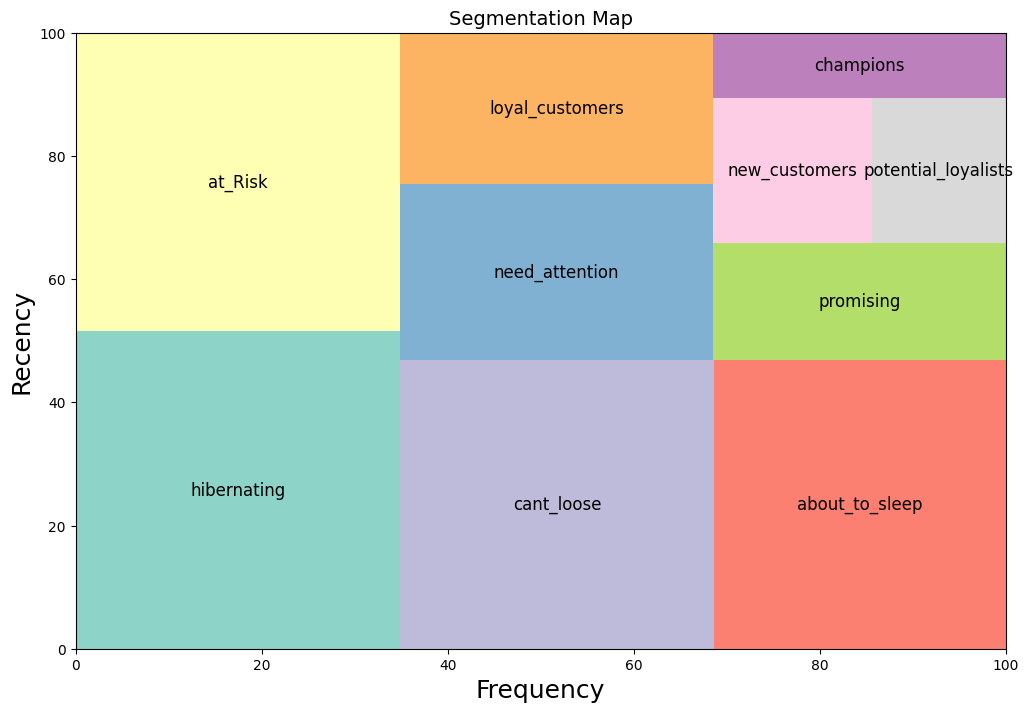

In [22]:
segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)

palette = sns.color_palette("Set3", len(segments))

squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=palette,
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 12},
)

plt.title("Segmentation Map", fontsize=14)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

Check the recency, frequency and monetary averages of the segments.

In [23]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg("mean")

,recency,frequency,monetary
segment,,,
about_to_sleep,114.032,2.407,361.649
at_Risk,242.329,4.470,648.325
cant_loose,235.159,10.717,1481.652
champions,17.142,8.965,1410.709
hibernating,247.426,2.391,362.583
loyal_customers,82.558,8.356,1216.257
need_attention,113.037,3.739,553.437
new_customers,17.976,2.000,344.049
potential_loyalists,36.870,3.311,533.741


FLO is adding a new women's shoe brand to its portfolio. The product prices of the brand it added are above general customer preferences. Therefore, it is desired to contact customers with profiles that will be interested in the promotion of the brand and product sales. Loyal customers (champions, loyal_customers) and people who shop from the women's category are the customers to be contacted specifically. Save the id numbers of these customers to the csv file.

In [24]:
merged_df = pd.merge(df, rfm, on="master_id", how="inner")
target_segments = ["champions", "loyal_customers"]
target_customers = merged_df[(merged_df["segment"].isin(target_segments)) &
                             (merged_df["interested_in_categories_12"].str.contains("KADIN"))]

target_customers_list = target_customers["master_id"]
target_customers_list.head()

#target_customers_list.to_csv("yeni_marka_hedef_müşteri_id.csv", index=False)

0     cc294636-19f0-11eb-8d74-000d3a38a36f
1     f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8     cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11    c2e15af2-9eed-11e9-9897-000d3a38a36f
33    fb840306-1219-11ea-a001-000d3a38a36f
Name: master_id, dtype: object

A discount of nearly 40% is planned for Men's and Children's products. The target customers include those who have been valuable in the past but have not shopped for a long time, customers who should not be lost, dormant customers, and new customers who are interested in the relevant discount categories. Save the IDs of customers matching this profile to a CSV file.

In [25]:
merged_df = pd.merge(df, rfm, on="master_id", how="inner")

target_segments = ["cant_loose", "hibernating", "new_customers"]
target_customers = merged_df[(merged_df["segment"].isin(target_segments)) &
                             (merged_df["interested_in_categories_12"].str.contains("ERKEK | COCUK"))]

target_customers_list = target_customers["master_id"]
target_customers_list.head()

#target_customers_list.to_csv("indirim_hedef_müşteri_ids.csv", index=False)

10     ae608ece-c9d8-11ea-a31e-000d3a38a36f
15     13ed97a4-b167-11e9-89fa-000d3a38a36f
76     7d58deb6-62fa-11ea-a6dc-000d3a38a36f
130    ae557c64-5b29-11ea-b304-000d3a38a36f
147    90e0b158-2b54-11ea-9d27-000d3a38a36f
Name: master_id, dtype: object